## Question 18: Difference between early and recent ALCX adopters

By: dtradke, CCV, Ryanl

Date: April 18, 2021

From the initial launch of the protocol's native ALCX tokens at 348 USD on February 27th, 2021, to completing a 4.9 million USD funding round at 700 USD per token on March 13th, 2021, to the present price of 1,478.20 USD per token, Alchemix has generated a substantial deal of buzz and is revolutionizing how loans are perceived.

In this notebook, we analyze how early adopters and the most recent adopters of Alchemix (ALCX) differ with the percent of their wallets belonging to ALCX, and the value of staked coin in the 4 staking pools. We separately compare the compositions of user balances and staked amounts to compare each separately among the two types of users: early and late adopters of ALCX.

Our notebook specifically addresses the question of what the average portfolio value and percent of portfolio value is in ALCX and staked in pools for early (first 3 weeks) and late (recent 3 weeks) adopters.

First, we must gather the information from Flipside's database and then import the libraries used for analysis.

#### Gathering Data from Flipside
See flipside data dashboard here: https://app.flipsidecrypto.com/dashboard/bounty-question-18-how-is-the-behavior-of-early-vs-late-adopters-of-alcx-different-5MfCL5

Data was gathered through 5 Flipside queries:
* ALCX Early Adopters - Adopters within the first 3x weeks of launch
* ALCX Late Adopters - Adopters within the last 3x weeks of launch
* ALCX Staking Transactions - In/Out staking transactions to all 4 farming pools
* Full Portfolio value - Full portfolio value of ALCX addresses
* ALCX Portfolio value - ALCX value of ALCX addresses


In [1]:
import numpy as np
import urllib.request as rq
import json
from collections import Counter as c
import time
import matplotlib.pyplot as plt
import os
import pandas as pd
import operator
import datetime

Now we import the backend code which helps pre-process all of the data used for our analysis.

In [2]:
import util

Backend Loaded


We will then import important metrics for both groups of users: balances and staked value tables which we will reference using user addresses for the rest of the notebook.

In [3]:
# load amount of current ALCX owned by users
url = 'https://api.flipsidecrypto.com/api/v2/queries/ddf70c0d-d6e2-41a1-a014-6f33e84fab72/data/latest' # people with ALCX and amount of ALCX IN UDS
alcx_holder_data = util.loadData(url)
alcx_holders = util.formatHolders(alcx_holder_data)
alcx_holders = util.addALCXData(alcx_holders, alcx_holder_data)

In [4]:
# value of portfolios including ALCX
url = 'https://api.flipsidecrypto.com/api/v2/queries/666e59c4-0759-41a6-8fe5-21305ba4ba50/data/latest' # whole profile including ALCX
portfolios = util.loadData(url)
alcx_holders = util.addOtherData(alcx_holders, portfolios)

In [5]:
# load amount staked
url = 'https://api.flipsidecrypto.com/api/v2/queries/c44f9d8a-6a8c-4a6d-97f4-2f3a9cab6e54/data/latest' # transactions to staking pools
staked = util.loadData(url)

Now we will import the addresses for the original ALCX holders (first 3 weeks) and format them to calculate their percent of portfolio belonging to ALCX and their amount staked in pools.

In [6]:
# load holders from the first 3 weeks of ALCX
url = 'https://api.flipsidecrypto.com/api/v2/queries/89eb6960-72db-499a-97cd-318098955410/data/latest' # OG HOLDERS
og_holders = util.loadData(url)
og_holders = util.formatHoldersWData(og_holders, alcx_holders)

Mean percent of portfolio in ALCX:  0.3092097091619238


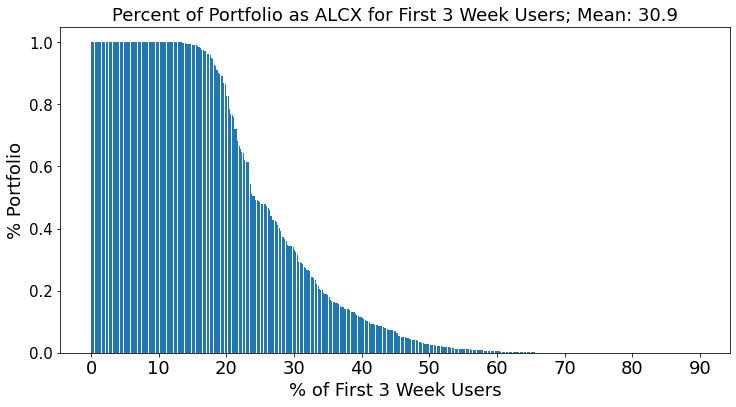

In [7]:
# calculate percent of portfolios that are ALCX
util.getPercALCX(og_holders, mode='First')

Mean amount of staked value:  1675093.8499568817


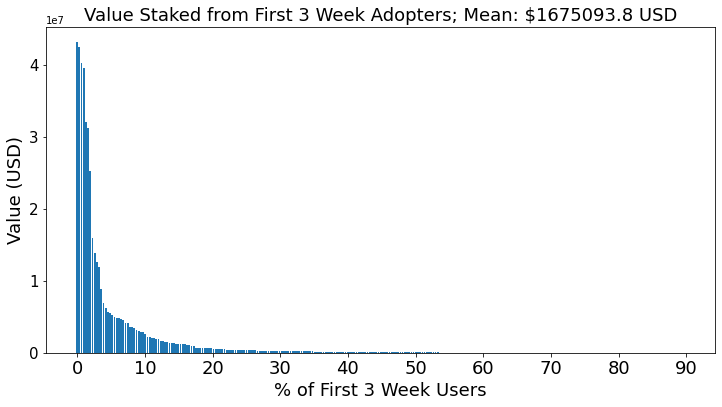

In [8]:
# Calculate the value staked by early adopters
og_holders_w_stake = util.getStakedAmt(staked, og_holders)
util.getAvgStaked(og_holders_w_stake, mode='First')

Next, we will import the most recent user's data and format the addresses for the same analysis as the original addresses above. Namely, we will analyze the percent belonging to ALCX and value staked in pools.

In [9]:
# load new holders in the last 3 weeks
url = 'https://api.flipsidecrypto.com/api/v2/queries/b662564a-f43a-4a78-b6c5-3ebeaeb14c51/data/latest' # end of march to present
new_holders = util.loadData(url)
new_holders = util.formatHoldersWData(new_holders, alcx_holders)
new_holders = util.filterAdds(og_holders, new_holders)

Mean percent of portfolio in ALCX:  0.42772042560832496


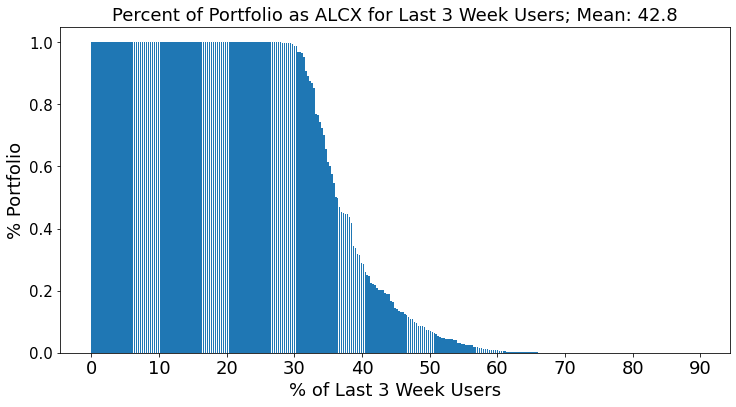

In [10]:
# calculate percent of portfolios that are ALCX
util.getPercALCX(new_holders, mode='Last')

Mean amount of staked value:  447226.2373175027


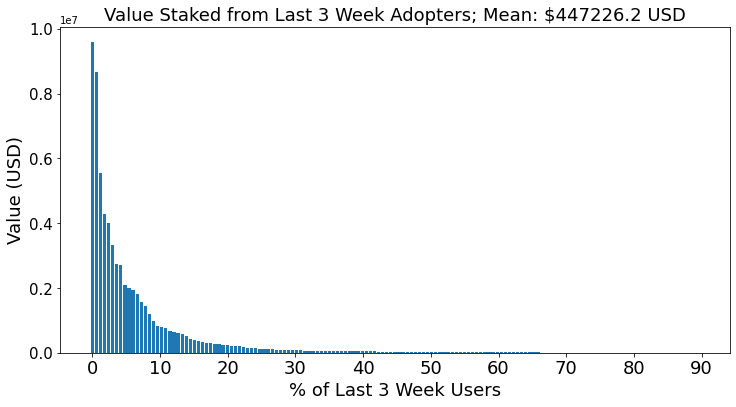

In [11]:
# Calculate the value staked by late adopters
new_holders_w_stake = util.getStakedAmt(staked, new_holders)
util.getAvgStaked(new_holders_w_stake, mode='Last')

#### Conclusion
##### A. Early Adopters have other interests compared to Late Adopters
Comparing the ALCX portfolio percentage between the early adopters and late adopters, Early adopters have less of their portfolios in ALCX, with roughly only *18%* holding only ALCX. In comparison, around *30%* of late adopters hold only ALCX. We speculate that early adopters are more knowledgeable in the DeFi space and already have a developed portfolio whereas late adopters are more novice.
##### B. Early Adopters have much more value staked than Late Adopters
Some early adopters have upwards of $40,000,000 USD in Alchemix farming pools, whereas the biggest staker in the late adopters group is 10,000,000. In terms of percentages, around 55% of early adopters have USD staked in farming pools. However, roughly 66% of of late adopters have at least a small portion of their portfolio staked.